In [ ]:
# Import necessary libraries for data handling, visualization, and text processing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [6]:
# Load the dataset from a CSV file

dataset = pd.read_csv('./toxicity_data.csv')

# Print basic info about dataset: shape, columns, data types, and summary statistics

print("Shape of dataset:", dataset.shape)
dataset.info()
dataset.describe(include="all")

Shape of dataset: (159571, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571,159571,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
unique,159571,159571,NaN,NaN,NaN,NaN,NaN,NaN
top,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,NaN,NaN,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
# Show first 10 rows to get a sense of data

dataset.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\r\n\r\nCongratulations from me as well, use ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [8]:
# Drop the 'id' column as it is not needed for modeling

dataset.drop("id", axis=1, inplace=True)
dataset.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
# Check for missing values in the dataset

print("Missing values:\n", dataset.isnull().sum())

Missing values:
 comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [10]:
# Define label columns for different types of toxicity

label_cols = ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]

In [11]:
# Create a single target column: 1 if any toxicity type is present, 0 otherwise

dataset['target'] = (dataset[label_cols].sum(axis=1) > 0).astype(int)
print(dataset['target'].value_counts())

target
0    143346
1     16225
Name: count, dtype: int64


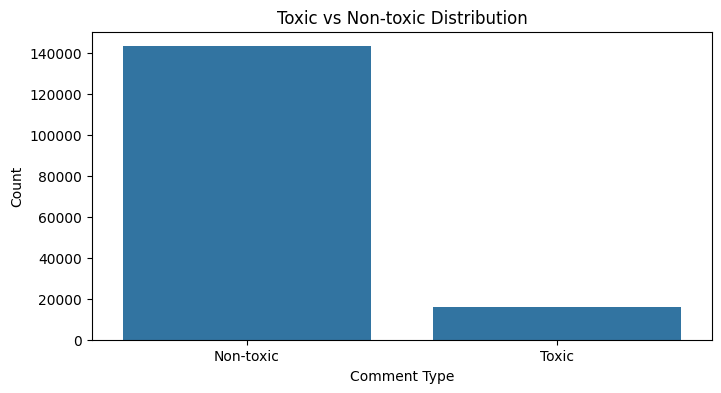

In [12]:
# Create a human-readable target label for visualization

dataset['target_label'] = dataset['target'].map({0: "Non-toxic", 1: "Toxic"})

# Visualize distribution of toxic vs non-toxic comments

plt.figure(figsize=(8,4))
sns.countplot(x="target_label", data=dataset, order=["Non-toxic", "Toxic"])
plt.title("Toxic vs Non-toxic Distribution")
plt.xlabel("Comment Type")
plt.ylabel("Count")
plt.show()

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


<Axes: title={'center': 'Distribution of Toxic Categories'}>

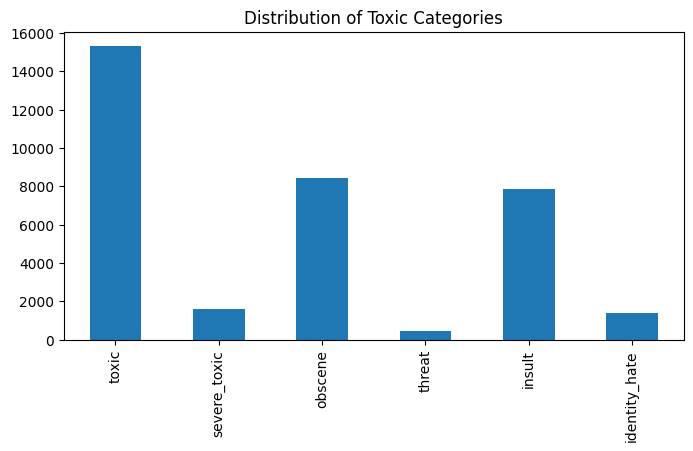

In [13]:
# Show distribution of individual toxicity categories

print(dataset[label_cols].sum())
dataset[label_cols].sum().plot(kind="bar", figsize=(8,4), title="Distribution of Toxic Categories")

In [14]:
# Define a text cleaning function
# Steps: lowercase, remove line breaks, URLs, mentions, special characters, and extra spaces

def clean_text(text):
    text = text.lower()                          # lowercase
    text = re.sub(r"\n", " ", text)              # remove line breaks
    text = re.sub(r"http\S+", "", text)          # remove URLs
    text = re.sub(r"@\w+", "", text)             # remove @mentions
    text = re.sub(r"[^a-z\s]", "", text)         # remove special chars/numbers
    text = re.sub(r"\s+", " ", text).strip()     # remove extra spaces
    return text

# Apply the cleaning function to all comments

dataset['clean_comment'] = dataset['comment_text'].apply(clean_text)
dataset

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,target,target_label,clean_comment
0,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0,0,Non-toxic,explanation why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,Non-toxic,daww he matches this background colour im seem...
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,Non-toxic,hey man im really not trying to edit war its j...
3,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0,0,Non-toxic,more i cant make any real suggestions on impro...
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,Non-toxic,you sir are my hero any chance you remember wh...
...,...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,Non-toxic,and for the second time of asking when your vi...
159567,You should be ashamed of yourself \r\n\r\nThat...,0,0,0,0,0,0,0,Non-toxic,you should be ashamed of yourself that is a ho...
159568,"Spitzer \r\n\r\nUmm, theres no actual article ...",0,0,0,0,0,0,0,Non-toxic,spitzer umm theres no actual article for prost...
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,Non-toxic,and it looks like it was actually you who put ...


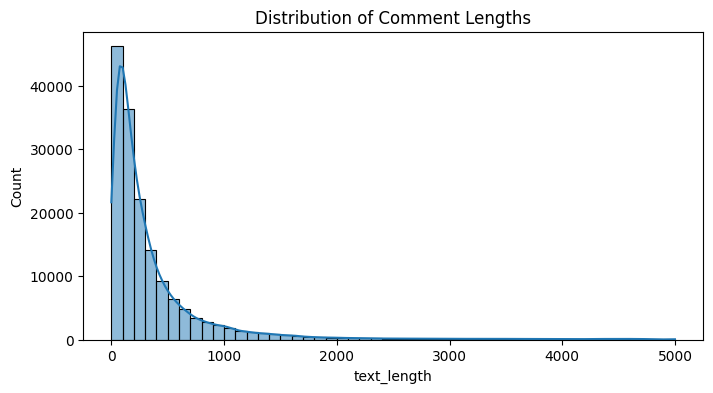

In [15]:
# Add a column to store length of each comment (useful for analysis or filtering)

dataset['text_length'] = dataset['clean_comment'].apply(len)

# Visualize distribution of comment lengths

plt.figure(figsize=(8,4))
sns.histplot(dataset['text_length'], bins=50, kde=True)
plt.title("Distribution of Comment Lengths")
plt.show()

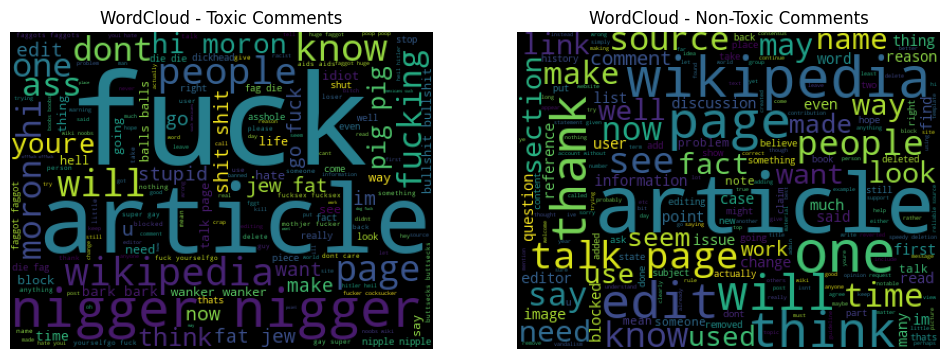

In [16]:
# Import WordCloud library for visualizing most common words

from wordcloud import WordCloud

# Create a single string of all toxic comments for wordcloud
toxic_comments = " ".join(dataset[dataset['target']==1]['clean_comment'].tolist())
# Create a single string of all non-toxic comments for wordcloud
nontoxic_comments = " ".join(dataset[dataset['target']==0]['clean_comment'].tolist())


# Plot word clouds for toxic and non-toxic comments

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=400, height=300).generate(toxic_comments))
plt.title("WordCloud - Toxic Comments")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=400, height=300).generate(nontoxic_comments))
plt.title("WordCloud - Non-Toxic Comments")
plt.axis("off")
plt.show()

In [ ]:
# Save cleaned dataset to a new CSV file for further use in modeling

dataset.to_csv("toxicity_cleaned.csv", index=False)

In [ ]:
# Import all required libraries and configure LangSmith tracking

import os
import logging
import json
import time
import re
from typing import List, Dict, Any
from dotenv import load_dotenv

# Core LangChain libraries
from langchain_community.document_loaders import CSVLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.embeddings import SentenceTransformerEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_groq import ChatGroq
from langchain.agents import Tool, AgentExecutor, create_react_agent
from langchain.prompts import PromptTemplate
from langchain.memory import ConversationBufferWindowMemory

# Load environment variables
load_dotenv()

# API Keys
GROQ_API_KEY = os.environ.get("GROQ_API_KEY")

# LangSmith Configuration for tracking
LANGSMITH_API_KEY = os.environ.get("LANGSMITH_API_KEY")
LANGSMITH_PROJECT = os.environ.get("LANGSMITH_PROJECT")
LANGSMITH_ENDPOINT = os.environ.get("LANGSMITH_ENDPOINT")
LANGCHAIN_TRACING_V2 = os.environ.get("LANGCHAIN_TRACING_V2", "true")


print("✓ All libraries imported and LangSmith configured")

c:\Users\nikhi\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✓ All libraries imported and LangSmith configured


In [23]:
# Load CSV data using LangChain CSVLoader

loader = CSVLoader(
    file_path="toxicity_cleaned.csv", 
    encoding="utf-8",
    csv_args={"delimiter": ","}
)

# Load all documents from CSV
documents = loader.load()

print(f"Loaded {len(documents)} documents successfully")

# Display sample document structure
print("\nSample document structure:")
print(f"Content preview: {documents[0].page_content[:200]}...")
print(f"Metadata: {documents[0].metadata}")

Loaded 159571 documents successfully

Sample document structure:
Content preview: comment_text: Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please ...
Metadata: {'source': 'toxicity_cleaned.csv', 'row': 0}


In [24]:
# Split documents into smaller chunks for optimal retrieval

print("Chunking documents...")

# Configure text splitter for optimal chunk size
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=300,       # Each chunk ~300 characters
    chunk_overlap=50,     # Overlap ensures context continuity  
    length_function=len
)

# Split loaded documents into smaller chunks
chunked_docs = text_splitter.split_documents(documents)

print(f"Chunked {len(documents)} documents into {len(chunked_docs)} chunks")

# Display sample chunk
print("\nSample chunk:")
print(f"Chunk content: {chunked_docs[0].page_content}")
print(f"Chunk metadata: {chunked_docs[0].metadata}")


Chunking documents...
Chunked 159571 documents into 784684 chunks

Sample chunk:
Chunk content: comment_text: Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
toxic: 0
Chunk metadata: {'source': 'toxicity_cleaned.csv', 'row': 0}


In [25]:
# Initialize the embedding model for converting text to vectors

# Create embeddings using sentence transformers
embeddings = SentenceTransformerEmbeddings(model_name="BAAI/bge-small-en-v1.5")

# Test embedding functionality
test_vec = embeddings.embed_query("This is a toxic comment!")
print(f"Embeddings model initialized")
print(f"Embedding vector length: {len(test_vec)}")
print(f"Sample vector values: {test_vec[:5]}")


C:\Users\nikhi\AppData\Local\Temp\ipykernel_10500\872640027.py:4: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = SentenceTransformerEmbeddings(model_name="BAAI/bge-small-en-v1.5")


Embeddings model initialized
Embedding vector length: 384
Sample vector values: [0.0071853287518024445, 0.052031319588422775, 0.02139032632112503, -4.7829191316850483e-05, 0.022067701444029808]


In [ ]:
# Vector store creation 

from langchain.docstore.in_memory import InMemoryDocstore
from tqdm import tqdm
import faiss

batch_size = 128
embedding_dim = 384

# indexing with HNSW Flat index for efficient and fast similarity search
index = faiss.IndexHNSWFlat(embedding_dim, 32)
vectorstore = FAISS(
    index=index,
    embedding_function=embeddings,
    docstore=InMemoryDocstore({}),
    index_to_docstore_id={}
)

In [ ]:
# Create vector embeddings and save them locally

for i in tqdm(range(0, len(chunked_docs), batch_size)):
    batch = chunked_docs[i:i+batch_size]
    vectorstore.add_documents(batch)

vectorstore.save_local("faiss_vector_store")
print("Vector store saved!")

In [27]:
# Load the pre-built FAISS vector store

vectorstore = FAISS.load_local(
    "faiss_vector_store",
    embeddings,
    allow_dangerous_deserialization=True
)

print("Vector store loaded successfully")

Vector store loaded successfully


In [28]:
# Initialize chat model and retriever

chat_model = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0.2,
    groq_api_key=GROQ_API_KEY,
    max_tokens=1024
)

retriever = vectorstore.as_retriever(search_kwargs={"k": 4})

print("Chat model initialized")
print("Retriever configured")

Chat model initialized
Retriever configured


In [8]:
# Helper function for safe model invocation

def safe_invoke(model, prompt):
    """Safe model invocation"""
    response = model.invoke(prompt)
    return response.content if hasattr(response, 'content') else str(response)

print("Helper function created")


Helper function created


In [ ]:
# Global variables for maintaining context
last_analysis = None
last_analyzed_text = None
analysis_history = []

print("Context variables initialized")

# Detect user intent using LLM

def detect_user_intent(user_input: str) -> Dict[str, Any]:
    """LLM-powered intent detection to route queries"""
    global last_analysis, last_analyzed_text
    
    has_previous_analysis = bool(last_analysis)
    previous_text = last_analyzed_text if has_previous_analysis else "None"
    
    intent_prompt = f"""You are an intent classification expert for a toxicity detection system. 
            Analyze the user's query and classify it into ONE category:

            1. **followup** - Questions about PREVIOUS analysis or requests for MORE suggestions/alternatives
            2. **pattern** - Requests to FIND patterns, examples, or search the database  
            3. **educational** - Questions asking WHY something is harmful
            4. **analyze** - NEW text to analyze for toxicity

            CONTEXT:
            - Previous analysis exists: {has_previous_analysis}
            - Previously analyzed text: "{previous_text}"

            USER QUERY: "{user_input}"

            Respond in JSON format:
            {{"intent": "followup|pattern|educational|analyze", "confidence": 0.0-1.0, "reasoning": "brief explanation"}}"""
                        
    response = safe_invoke(chat_model, intent_prompt)
    json_match = re.search(r'\{.*\}', response, re.DOTALL)
    
    if json_match:
        result = json.loads(json_match.group())
        if result["intent"] == "followup" and not has_previous_analysis:
            result = {"intent": "analyze", "confidence": 0.8, "reasoning": "No previous analysis"}
        return result
    
    return {"intent": "analyze", "confidence": 0.5, "reasoning": "Fallback"}

print("Intent detection function created")


Context variables initialized
Intent detection function created


In [ ]:
# Tool 1: Toxicity Analyzer

def toxicity_analyzer(query: str) -> str:
    """Analyze toxicity of NEW text"""
    global last_analysis, last_analyzed_text, analysis_history
    
    docs = retriever.get_relevant_documents(f"toxicity analysis: {query}")
    context = "\n".join([doc.page_content for doc in docs[:2]])
    
    prompt = f"""You are a toxicity analysis expert. Analyze this text: "{query}"

            Context from database: {context}

            CLASSIFICATION RULES:
            - Genuine compliments (beautiful, handsome, nice, good job) = NOT TOXIC
            - Insults, threats, harassment, hate speech = TOXIC
            - Use positive intent assumption for borderline cases

            AVAILABLE CATEGORIES (use if toxic):
            - toxic, severe_toxic, obscene, threat, insult, identity_hate

            Provide analysis in this format:
            TOXICITY: [Yes/No]
            SEVERITY: [1-10 if toxic, N/A if not toxic]
            CATEGORIES: [List applicable categories, or N/A]
            EXPLANATION: [Clear reasoning]
            PARAPHRASED: [If toxic - rewrite non-toxically, else "Not needed"]
            SUGGESTION: [If toxic - communication advice, else "None needed"]
            ANALYSIS SUMMARY: [Brief assessment]"""
    
    response = safe_invoke(chat_model, prompt)
    
    # Store for follow-up questions
    last_analysis = response
    last_analyzed_text = query
    analysis_history.append({
        "text": query,
        "analysis": response,
        "timestamp": time.time(),
        "tool": "ToxicityAnalyzer"
    })
    
    return response

print("Toxicity Analyzer created")


Toxicity Analyzer created


In [ ]:
# Tool 2: Pattern Finder

def pattern_finder(query: str) -> str:
    """Find toxic patterns and examples"""
    global analysis_history
    
    query_lower = query.lower()
    if 'general' in query_lower or 'some examples' in query_lower:
        search_query = "toxic comments examples insults threats"
    else:
        search_query = f"toxic patterns: {query}"
    
    docs = retriever.get_relevant_documents(search_query)
    context = "\n".join([doc.page_content for doc in docs[:4]])
    
    prompt = f"""You are a toxicity pattern analysis expert. The user asked: "{query}"

            Context from database (real toxic examples):
            {context}

            Provide analysis in this format:
            COMMON PATTERNS:
            - [Pattern 1 with severity level]
            - [Pattern 2 with severity level]  
            - [Pattern 3 with severity level]

            PATTERN ANALYSIS:
            - Why these patterns are harmful
            - Common characteristics
            - Detection indicators

            EXAMPLES (from database):
            - [Real toxic example 1]
            - [Real toxic example 2]
            - [Real toxic example 3]"""
    
    response = safe_invoke(chat_model, prompt)
    
    # Store in history but DON'T overwrite last_analysis
    analysis_history.append({
        "text": query,
        "analysis": response,
        "timestamp": time.time(),
        "tool": "PatternFinder"
    })
    
    return response

print("Pattern Finder created")


Pattern Finder created


In [ ]:
# Tool 3: Educational Guide

def educational_guide(query: str) -> str:
    """Provide educational guidance"""
    global analysis_history
    
    docs = retriever.get_relevant_documents(f"education harm: {query}")
    base_context = "\n".join([doc.page_content for doc in docs[:2]])
    
    prompt = f"""You are a toxicity education expert. Explain why this is harmful: "{query}"

            Educational context: {base_context}

            Provide clear education:
            HARM TYPE: [specific toxicity category]
            IMPACT: [who gets hurt and how]
            WHY HARMFUL: [psychological/social effects]
            BETTER APPROACH: [constructive alternatives]
            EDUCATIONAL SUMMARY: [Key learning points]"""
    
    response = safe_invoke(chat_model, prompt)
    
    # Store in history but DON'T overwrite last_analysis
    analysis_history.append({
        "text": query,
        "analysis": response,
        "timestamp": time.time(),
        "tool": "EducationalGuide"
    })
    
    return response

print("Educational Guide created")


Educational Guide created


In [ ]:
# Tool 4: Conversation Assistant (for follow-ups)

def conversation_assistant(query: str) -> str:
    """Answer follow-up questions about previous analysis"""
    global last_analysis, last_analyzed_text, analysis_history
    
    # Find the most recent toxicity analysis
    last_toxicity_analysis = None
    last_toxic_text = None
    
    for item in reversed(analysis_history):
        if item.get("tool") == "ToxicityAnalyzer":
            last_toxicity_analysis = item.get("analysis")
            last_toxic_text = item.get("text")
            break
    
    if not last_toxicity_analysis:
        if last_analysis:
            last_toxicity_analysis = last_analysis
            last_toxic_text = last_analyzed_text
        else:
            return "No toxicity analysis found. Please analyze some text first."
    
    # Determine follow-up type
    followup_type_prompt = f"""You are classifying a follow-up question.

                ORIGINAL ANALYZED TEXT: "{last_toxic_text}"
                USER'S FOLLOW-UP QUESTION: "{query}"

                Classify as ONE word: EXTRACTION, GENERATION, or REFINEMENT

                EXTRACTION - retrieve info from existing analysis (severity, categories, explanation)
                GENERATION - create NEW content (more suggestions, additional alternatives)
                REFINEMENT - modify existing content (make it casual, shorter, more formal)

                Your classification:"""
    
    followup_type = safe_invoke(chat_model, followup_type_prompt).strip().upper()
    
    if "EXTRACTION" in followup_type:
        prompt = f"""Extract information from this analysis:

                ORIGINAL TEXT: "{last_toxic_text}"
                FULL ANALYSIS:
                {last_toxicity_analysis}

                USER'S QUESTION: "{query}"

                Extract and return the relevant information directly."""
        
        response = safe_invoke(chat_model, prompt)
        return f"Answer: {response}"
    
    elif "REFINEMENT" in followup_type:
        prompt = f"""Refine content from this analysis:

                ORIGINAL TOXIC TEXT: "{last_toxic_text}"
                PREVIOUS ANALYSIS:
                {last_toxicity_analysis}

                USER'S REFINEMENT REQUEST: "{query}"

                Apply the requested style modification and provide refined content."""
        
        response = safe_invoke(chat_model, prompt)
        return f"Refined Version: {response}"
    
    else:  # GENERATION
        docs = retriever.get_relevant_documents(f"paraphrase alternatives: {last_toxic_text}")
        context_examples = "\n".join([doc.page_content for doc in docs[:3]])
        
        # Extract what was already provided
        extraction_prompt = f"""List ONLY the suggestions/alternatives already in this analysis:
{last_toxicity_analysis}"""
        
        already_provided = safe_invoke(chat_model, extraction_prompt)
        
        prompt = f"""Generate ADDITIONAL content for this analysis:

            ORIGINAL TOXIC TEXT: "{last_toxic_text}"

            ALREADY PROVIDED (DO NOT REPEAT):
            {already_provided}

            DATABASE EXAMPLES (for inspiration):
            {context_examples}

            USER'S REQUEST: "{query}"

            Generate 3-5 COMPLETELY NEW suggestions/alternatives that are DIFFERENT from what was already provided."""

        response = safe_invoke(chat_model, prompt)
        return f"Additional Content: {response}"

print("Conversation Assistant created")


Conversation Assistant created


In [14]:
# Create tools dictionary and agent tools

# Tools dictionary for direct routing
tools = {
    "analyze": toxicity_analyzer,
    "pattern": pattern_finder,
    "educational": educational_guide,
    "followup": conversation_assistant
}

# Agent tools for ReAct agent
agent_tools = [
    Tool(
        name="toxicity_analyzer",
        func=toxicity_analyzer,
        description="Analyze text for toxicity, insults, threats, or harmful content"
    ),
    Tool(
        name="pattern_finder",
        func=pattern_finder,
        description="Find patterns and examples of toxic behavior"
    ),
    Tool(
        name="educational_guide",
        func=educational_guide,
        description="Explain why certain language is harmful and suggest better alternatives"
    ),
    Tool(
        name="followup_qa",
        func=conversation_assistant,
        description="Answer follow-up questions about previous toxicity analysis"
    )
]

print(f"Created {len(tools)} tools")
print("Agent tools configured")


Created 4 tools
Agent tools configured


In [ ]:
# Configure memory and ReAct agent

# Conversation memory
memory = ConversationBufferWindowMemory(
    k=10,
    memory_key="chat_history",
    return_messages=True
)

# ReAct agent prompt
react_prompt = PromptTemplate.from_template("""You are a toxicity detection assistant with access to specialized tools.

                    You have access to the following tools:
                    {tools}

                    IMPORTANT:
                    - If user provides text to analyze, use toxicity_analyzer
                    - If user asks for patterns, use pattern_finder
                    - If user asks why something is harmful, use educational_guide
                    - If user asks about previous analysis, use followup_qa
                    - Return tool outputs EXACTLY without modification

                    Use this format:
                    Question: {input}
                    Thought: [your reasoning]
                    Action: [one of {tool_names}]
                    Action Input: [the input]
                    Observation: [result]
                    Thought: I now know the final answer
                    Final Answer: [the answer]

                    Begin!
                    Question: {input}
                    Thought:{agent_scratchpad}""")

# Create agent
agent = create_react_agent(chat_model, agent_tools, react_prompt)

# Agent executor
agent_executor = AgentExecutor(
    agent=agent,
    tools=agent_tools,
    verbose=True,
    memory=memory,
    handle_parsing_errors=True,
    max_iterations=5,
    early_stopping_method="generate"
)

print("Memory and ReAct agent configured")
print("System ready!")


Memory and ReAct agent configured
System ready!


C:\Users\nikhi\AppData\Local\Temp\ipykernel_5616\4205236733.py:4: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferWindowMemory(


In [16]:
# Sample usage - Direct tool routing (fast and efficient)

def process_query(user_input: str):
    """Process user query with smart routing"""
    # Detect intent
    intent_result = detect_user_intent(user_input)
    intent = intent_result["intent"]
    
    print(f"Detected Intent: {intent} (confidence: {intent_result['confidence']:.2f})")
    print(f"Reasoning: {intent_result['reasoning']}\n")
    print("=" * 60)
    
    # Route to appropriate tool
    tool_func = tools.get(intent)
    
    if tool_func:
        result = tool_func(user_input)
        return result
    else:
        return "Tool not found"

# Example 1: Analyze toxic text
print("\n📝 EXAMPLE 1: Toxicity Analysis")
print("-" * 60)
result1 = process_query("You are such an idiot")
print("\nResult:")
print(result1)



📝 EXAMPLE 1: Toxicity Analysis
------------------------------------------------------------
Detected Intent: analyze (confidence: 0.90)
Reasoning: The user query contains a direct insult, which is a common indicator of toxic language. The query does not ask a question, request a pattern, or seek educational information, but rather expresses a negative sentiment, suggesting it's a new text to analyze for toxicity.



C:\Users\nikhi\AppData\Local\Temp\ipykernel_5616\1323507761.py:7: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(f"toxicity analysis: {query}")



Result:
TOXICITY: Yes
SEVERITY: 8
CATEGORIES: insult
EXPLANATION: The text contains a derogatory term ("idiot") which is considered an insult. Although it's a strong statement, it doesn't contain hate speech, threats, or obscene language, which could have increased the severity score.
PARAPHRASED: You're not making sense to me.
SUGGESTION: Consider rephrasing the statement to express disagreement or confusion without using derogatory language.
ANALYSIS SUMMARY: The statement is toxic due to its insulting nature, but it's not severe enough to warrant a higher severity score.


In [17]:
# Example 2: Follow-up question

print("\n\n💬 EXAMPLE 2: Follow-up Question")
print("-" * 60)
result2 = process_query("What was the severity level?")
print("\nResult:")
print(result2)



💬 EXAMPLE 2: Follow-up Question
------------------------------------------------------------
Detected Intent: followup (confidence: 0.80)
Reasoning: The user is asking for a specific detail about a previous analysis, indicating they are following up on a previous conversation.


Result:
Refined Version: **Refined Analysis**

**ORIGINAL TOXIC TEXT:** "You are such an idiot"
**TOXICITY:** Yes
**SEVERITY:** 8
**CATEGORIES:** insult
**EXPLANATION:** The text contains a derogatory term ("idiot") which is considered an insult. Although it's a strong statement, it doesn't contain hate speech, threats, or obscene language, which could have increased the severity score.

**PARAPHRASED:** You're not making sense to me.
**SUGGESTION:** Consider rephrasing the statement to express disagreement or confusion without using derogatory language.

**ANALYSIS SUMMARY:** The statement is toxic due to its insulting nature, but it's not severe enough to warrant a higher severity score.

**USER'S QUESTION:

In [18]:
# Example 3: Pattern finding

print("\n\n📊 EXAMPLE 3: Pattern Finding")
print("-" * 60)
result3 = process_query("Show me examples of insult patterns")
print("\nResult:")
print(result3[:500] + "..." if len(result3) > 500 else result3)



📊 EXAMPLE 3: Pattern Finding
------------------------------------------------------------
Detected Intent: pattern (confidence: 0.90)
Reasoning: The user is asking for examples of insult patterns, which is a follow-up to the previous analysis of the text 'You are such an idiot'. The user is not asking for a new analysis or seeking educational information, but rather looking for patterns in the database.


Result:
**COMMON PATTERNS:**

- **Personal Attack with Obscenity** (High Severity)
- **Racial Slur with Insult** (High Severity)
- **Name Calling with Threat** (High Severity)
- **Sarcastic Comment with Insult** (Medium Severity)
- **Mocking Tone with Obscenity** (High Severity)

**PATTERN ANALYSIS:**

- **Why these patterns are harmful:** These patterns are designed to cause emotional distress, damage a person's reputation, or create a sense of fear. They often target specific individuals or groups, ma...


In [20]:
# Example 4: Educational query

print("\n\n📚 EXAMPLE 4: Educational Query")
print("-" * 60)
result4 = process_query("Why is hate speech harmful?")
print("\nResult:")
print(result4[:500] + "..." if len(result4) > 500 else result4)



📚 EXAMPLE 4: Educational Query
------------------------------------------------------------
Detected Intent: educational (confidence: 0.90)
Reasoning: The user is asking a general question about the harm caused by hate speech, which is not directly related to the previous analysis or requesting more suggestions. The tone of the question suggests a desire to understand the underlying reasons, which aligns with the educational intent category.


Result:
**HARM TYPE:** Obscene, Insult, Identity Hate, Threat

**IMPACT:** The recipient of this message, 'n. jobs', is likely to feel:

- Emotionally distressed due to the use of profanity and derogatory language.
- Belittled and disrespected by the insult and hate speech.
- Threatened by the aggressive tone and the mention of potential retaliation.
- Targeted based on their identity, which can lead to feelings of isolation and marginalization.

**WHY HARMFUL:** This type of language can have severe ps...


In [ ]:
# Load test datasets for evaluation

test = pd.read_csv("test.csv")
test_labels = pd.read_csv("test_labels.csv")

# Remove rows where any label is -1 (these were ignored in the competition)
labels_clean = test_labels[test_labels.iloc[:, 1:].ne(-1).all(axis=1)]

eval_df = test.merge(labels_clean, on="id")

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

def proper_toxicity_rag_evaluation(test_df, test_labels_df, retriever, vectorstore, k=5, sample_size=500):
    """
    Proper evaluation for toxicity detection RAG system
    Tests if retrieved documents match the toxicity categories of the query
    """
    
    # Category columns (adjust based on your actual columns)
    toxicity_categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    
    # Clean labels (remove -1 values)
    print("Cleaning test labels...")
    labels_clean = test_labels_df[test_labels_df[toxicity_categories].ne(-1).all(axis=1)]
    
    # Merge test data with labels
    eval_df = test_df.merge(labels_clean, on="id")
    
    # Only keep toxic samples (at least one category = 1)
    eval_df = eval_df[eval_df[toxicity_categories].sum(axis=1) > 0]
    
    print(f"Total toxic test samples: {len(eval_df)}")
    
    # Sample for evaluation
    if len(eval_df) > sample_size:
        eval_sample = eval_df.sample(n=sample_size, random_state=42)
    else:
        eval_sample = eval_df
    
    print(f"Evaluating on {len(eval_sample)} toxic samples with k={k}\n")
    
    # Metrics storage
    category_precisions = []
    category_recalls = []
    semantic_similarities = []
    category_match_rates = []
    
    for idx, row in eval_sample.iterrows():
        if idx % 50 == 0:
            print(f"Processed {idx}/{len(eval_sample)} samples...")
        
        query = row["comment_text"]
        query_categories = row[toxicity_categories].values
        
        try:
            # Retrieve documents
            docs = retriever.get_relevant_documents(query)[:k]
            
            if not docs:
                category_precisions.append(0.0)
                category_recalls.append(0.0)
                semantic_similarities.append(0.0)
                category_match_rates.append(0.0)
                continue
            
            # Method 1: Category-based evaluation (if you have labels in vectorstore)
            # Check if retrieved docs have similar toxicity categories
            matched_categories = 0
            retrieved_with_labels = 0
            
            for doc in docs:
                # Try to get labels from metadata (if available)
                if hasattr(doc, 'metadata') and 'labels' in doc.metadata:
                    doc_categories = doc.metadata['labels']
                    retrieved_with_labels += 1
                    
                    # Calculate category overlap
                    overlap = sum((query_categories == 1) & (doc_categories == 1))
                    if overlap > 0:
                        matched_categories += 1
            
            # Method 2: Semantic similarity evaluation
            # Check if retrieved content is semantically similar
            from sklearn.metrics.pairwise import cosine_similarity
            
            # Get embeddings (assuming you stored them)
            query_embedding = vectorstore.embedding_function.embed_query(query)
            doc_embeddings = [vectorstore.embedding_function.embed_query(doc.page_content) 
                            for doc in docs]
            
            # Calculate average similarity
            similarities = [cosine_similarity([query_embedding], [doc_emb])[0][0] 
                          for doc_emb in doc_embeddings]
            avg_similarity = np.mean(similarities)
            semantic_similarities.append(avg_similarity)
            
            # Method 3: Category match rate (what % of retrieved docs match at least one category)
            if retrieved_with_labels > 0:
                match_rate = matched_categories / retrieved_with_labels
                category_match_rates.append(match_rate)
                
                # Precision: Of k retrieved, how many are relevant?
                precision = matched_categories / k
                category_precisions.append(precision)
                
                # Recall: Did we retrieve at least one doc for each query category?
                query_cat_count = sum(query_categories == 1)
                if query_cat_count > 0:
                    recall = min(matched_categories / query_cat_count, 1.0)
                else:
                    recall = 0.0
                category_recalls.append(recall)
            else:
                # Fallback to semantic similarity if no labels available
                # Consider "relevant" if similarity > threshold
                relevant_count = sum(s > 0.7 for s in similarities)
                precision = relevant_count / k
                recall = 1.0 if relevant_count > 0 else 0.0
                
                category_precisions.append(precision)
                category_recalls.append(recall)
                category_match_rates.append(relevant_count / k)
            
        except Exception as e:
            print(f"Error processing sample {idx}: {e}")
            category_precisions.append(0.0)
            category_recalls.append(0.0)
            semantic_similarities.append(0.0)
            category_match_rates.append(0.0)
    
    # Calculate F1 scores
    f1_scores = [2 * p * r / (p + r) if (p + r) > 0 else 0.0 
                 for p, r in zip(category_precisions, category_recalls)]
    
    return {
        'precision': np.mean(category_precisions),
        'recall': np.mean(category_recalls),
        'f1': np.mean(f1_scores),
        'semantic_similarity': np.mean(semantic_similarities),
        'category_match_rate': np.mean(category_match_rates),
        'samples_evaluated': len(eval_sample),
        'detailed_results': {
            'precisions': category_precisions,
            'recalls': category_recalls,
            'f1s': f1_scores,
            'similarities': semantic_similarities
        }
    }



# Example usage
print("=" * 60)
print("PROPER RAG EVALUATION FOR TOXICITY DETECTION")
print("=" * 60)

# Run the evaluation
results = proper_toxicity_rag_evaluation(
    test_df=test,
    test_labels_df=test_labels,
    retriever=retriever,
    vectorstore=vectorstore,  
    k=5,
    sample_size=500
)

print("\n📊 EVALUATION RESULTS:")
print(f"Precision@5:          {results['precision']:.3f}")
print(f"Recall@5:             {results['recall']:.3f}")
print(f"F1@5:                 {results['f1']:.3f}")
print(f"Avg Semantic Similarity: {results['semantic_similarity']:.3f}")
print(f"Category Match Rate:  {results['category_match_rate']:.3f}")
print(f"Samples Evaluated:    {results['samples_evaluated']}")

print("\n📈 PERFORMANCE BREAKDOWN:")
high_precision = sum(p >= 0.6 for p in results['detailed_results']['precisions'])
high_recall = sum(r >= 0.6 for r in results['detailed_results']['recalls'])
high_f1 = sum(f >= 0.6 for f in results['detailed_results']['f1s'])

print(f"Samples with Precision ≥ 0.6: {high_precision} ({high_precision/results['samples_evaluated']*100:.1f}%)")
print(f"Samples with Recall ≥ 0.6:    {high_recall} ({high_recall/results['samples_evaluated']*100:.1f}%)")
print(f"Samples with F1 ≥ 0.6:        {high_f1} ({high_f1/results['samples_evaluated']*100:.1f}%)")

PROPER RAG EVALUATION FOR TOXICITY DETECTION
Cleaning test labels...
Total toxic test samples: 6243
Evaluating on 500 toxic samples with k=5



C:\Users\nikhi\AppData\Local\Temp\ipykernel_10500\229755923.py:47: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(query)[:k]


Processed 24100/500 samples...
Processed 2200/500 samples...
Processed 28700/500 samples...
Processed 52650/500 samples...
Processed 59000/500 samples...
Processed 900/500 samples...
Processed 53900/500 samples...
Processed 32150/500 samples...
Processed 45800/500 samples...
Processed 37500/500 samples...

📊 EVALUATION RESULTS:
Precision@5:          0.732
Recall@5:             0.938
F1@5:                 0.818
Avg Semantic Similarity: 0.785
Category Match Rate:  0.732
Samples Evaluated:    500

📈 PERFORMANCE BREAKDOWN:
Samples with Precision ≥ 0.6: 454 (90.8%)
Samples with Recall ≥ 0.6:    469 (93.8%)
Samples with F1 ≥ 0.6:        454 (90.8%)
